In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/healthcare-dataset


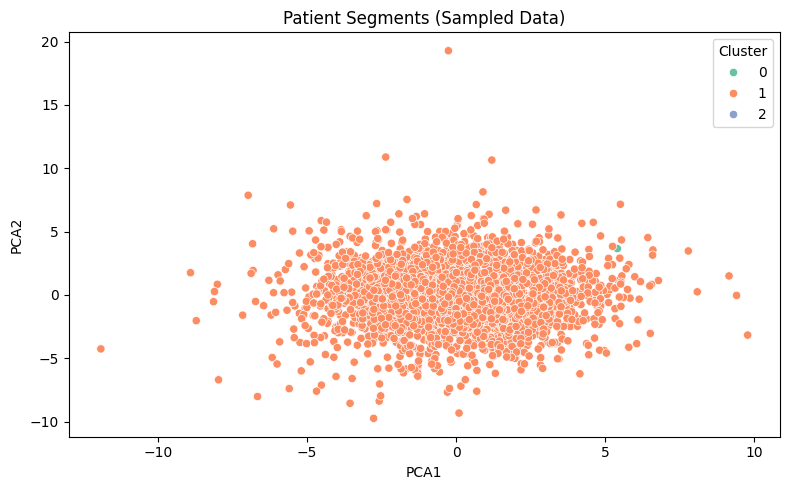

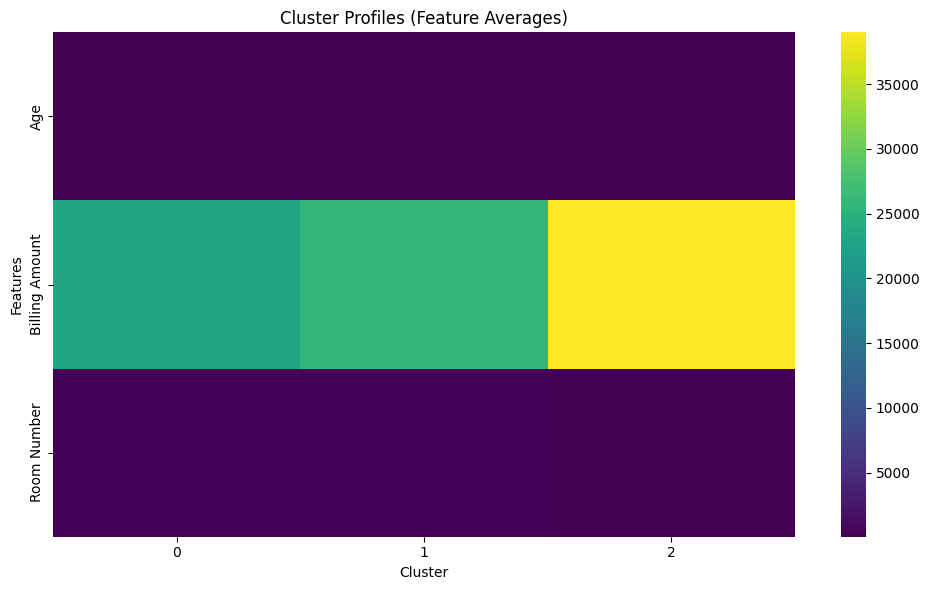

In [1]:
# STEP 1: Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# STEP 2: Load Sampled Data (reduce to 5,000 rows)
df = pd.read_csv("/kaggle/input/healthcare-dataset/healthcare_dataset.csv", nrows=5000)
df.drop(columns=['Name'], inplace=True)

# STEP 3: Encode + Clean
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.fillna(df_encoded.mean(), inplace=True)

# STEP 4: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# STEP 5: KMeans Clustering (3 segments)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# STEP 6: PCA for 2D View
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=["PCA1", "PCA2"])
df_pca['Cluster'] = df['Cluster']

# STEP 7: Plot PCA Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("Patient Segments (Sampled Data)")
plt.tight_layout()
plt.show()

# STEP 8: Heatmap of Cluster Averages
cluster_summary = df.groupby("Cluster").mean(numeric_only=True).T
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, cmap="viridis", annot=False)
plt.title("Cluster Profiles (Feature Averages)")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
